In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Nguyen Thai Phong/Desktop/data/active_customers.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['date'])

In [11]:
df.head()

,date,fk_customer,Date
0,5/8/2022,7e405a61-b95c-4eb0-910c-2adc8a24c6a6,2022-05-08
1,10/19/2021,cda92d7d-fc24-43da-8819-e31d3e5abd0a,2021-10-19
2,2/9/2022,8ee0ff92-c226-467c-b068-a28f35ab060e,2022-02-09
3,5/31/2022,67a5133d-ef17-49f7-badc-09fd767d3db0,2022-05-31
4,11/30/2021,73250b11-9a3e-4621-80a0-4c4cbb39b00c,2021-11-30


In [3]:
import pandas as pd
month_end = pd.read_csv('C:/Users/Nguyen Thai Phong/Desktop/data/month_end.csv')

In [12]:
month_end.head()

,year,month,first_date,end,start,index
0,2020,1,1/1/2020,1/31/2020,2/1/2019,0
1,2020,2,2/1/2020,2/29/2020,3/2/2019,1
2,2020,3,3/1/2020,3/31/2020,4/2/2019,2
3,2020,4,4/1/2020,4/30/2020,5/2/2019,3
4,2020,5,5/1/2020,5/31/2020,6/2/2019,4


In [5]:
month_end['index'] = month_end.index

from datetime import date
current_year = date.today().year
month_end=month_end.loc[(month_end['year']<= current_year)]

In [6]:
# looping

column = month_end["index"]
min_value = column.min()
max_value = column.max()

i=0

active_customers = []
new_users = []

for i in range (min_value,max_value + 1):
    filter_time=month_end.loc[(month_end['index'] == i)]
    end = filter_time.iat[0,3]
    start = filter_time.iat[0,4]
    filter_df = df[(df['Date'] >= start) & (df['Date'] <= end)]
    
    count = filter_df['fk_customer'].nunique()
    active_customers.append(count)    
    

In [7]:
from pandas import DataFrame

active_customers_df = DataFrame(active_customers,columns=['active_customers'])
active_customers_df['index'] = active_customers_df.index
active_customer=active_customers_df.merge(month_end,on=['index'])


In [10]:
active_customer.head()

,active_customers,index,year,month,first_date,end,start
0,0,0,2020,1,1/1/2020,1/31/2020,2/1/2019
1,0,1,2020,2,2/1/2020,2/29/2020,3/2/2019
2,0,2,2020,3,3/1/2020,3/31/2020,4/2/2019
3,0,3,2020,4,4/1/2020,4/30/2020,5/2/2019
4,0,4,2020,5,5/1/2020,5/31/2020,6/2/2019


<AxesSubplot:xlabel='first_date'>

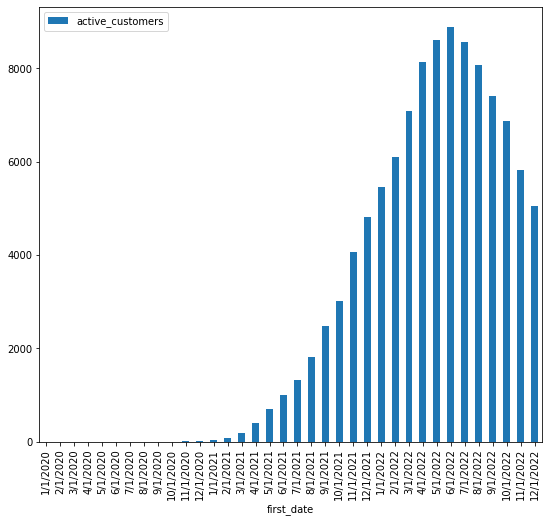

In [20]:
import matplotlib.pyplot as mp
active_customer.plot(x="first_date", y=["active_customers"], kind="bar", figsize=(9, 8))